In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
from src.utils.config_loader import load_config
cfg = load_config("../config.yaml")
data_cfg = cfg['data']

In [3]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
import torch

from src.data.visualization import visualize_comparison
from src.data.dataset_loader import DetectionDataset
from src.data.transforms import get_train_transforms, get_val_transforms

In [4]:
train_path = os.path.join("..",data_cfg['processed_dir'], data_cfg['train_parquet'])
val_path = os.path.join("..",data_cfg['processed_dir'], data_cfg['val_parquet'])
train_images = "../" + data_cfg['train_images']
val_images = "../" + data_cfg['val_images']
val_images


'../dataset/raw/images/val'

In [5]:
train_dataset = DetectionDataset(train_path, train_images, get_train_transforms())
val_dataset = DetectionDataset(val_path, val_images, get_val_transforms())

[INFO] Loaded parquet file - ../dataset/processed/parquet/train
[INFO] Loaded parquet file - ../dataset/processed/parquet/val


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


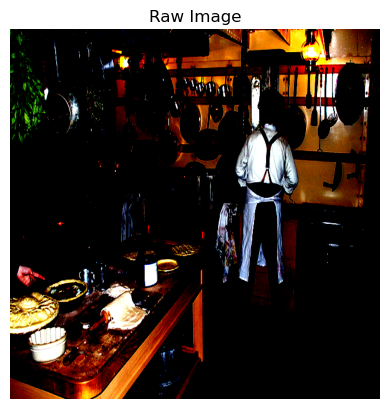

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


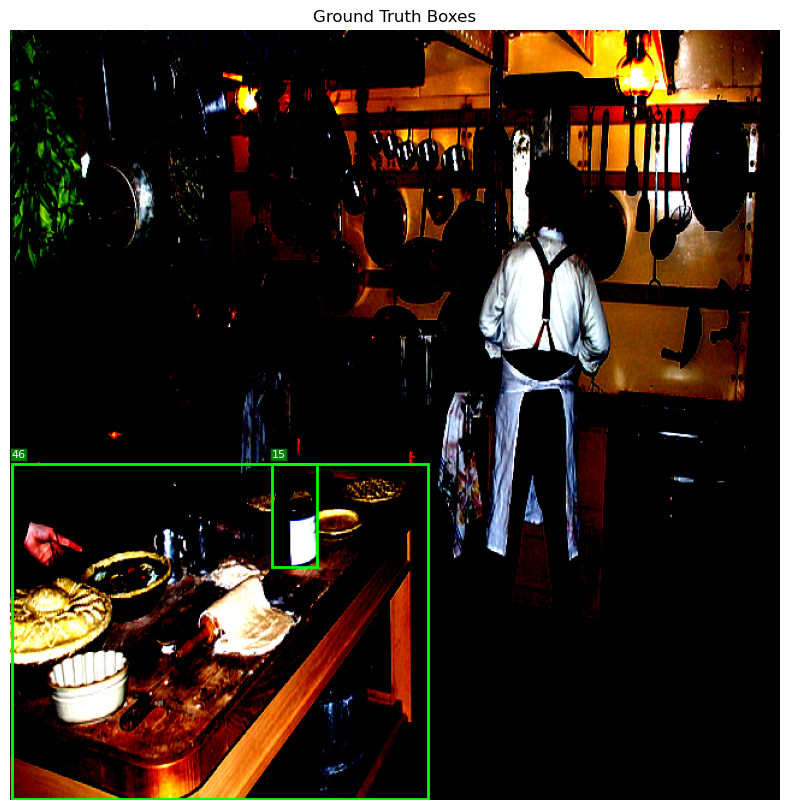

In [6]:
img, bbox = val_dataset.__getitem__(5)
visualize_comparison(image=img, target=bbox)

In [7]:
# Display first few rows of the training dataframe
print("Training Data Sample:")
display(train_dataset.df.head())

# Display basic info about columns and types
print("\nDataFrame Info:")
print(train_dataset.df.info())

Training Data Sample:


file_name  height  width      id  \
0  000000037777.jpg     230    352   37777   
1  000000463730.jpg     427    640  463730   
2  000000338428.jpg     366    640  338428   
3  000000312237.jpg     334    500  312237   
4  000000465836.jpg     375    500  465836   

                                        segmentation  \
0  [[[110.39, 135.78, 110.39, 127.62, 110.01, 119...   
1  [[[0.0, 242.0, 0.0, 262.0, 1.0, 262.0, 0.0, 26...   
2  [[[55.24, 74.36, 226.58, 32.25, 350.73, 62.74,...   
3  [[[92.62, 238.81, 95.59, 242.08, 104.27, 240.6...   
4  [[[219.96, 311.02, 216.07, 338.28, 213.73, 339...   

                                                area  \
0                                [88.52115000000006]   
1  [769.0, 166.0, 32504.88995, 15664.995900000004...   
2  [121420.53210000004, 3468.539300000001, 1242.4...   
3  [199.4566499999999, 343.7044999999998, 718.545...   
4  [561.8117000000005, 377.23499999999984, 673.60...   

                                             iscrowd  \
0                                                [0]   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2                           [0, 0, 0, 0, 0, 0, 0, 0]   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                                bbox  \
0                     [[102.49, 118.47, 7.9, 17.31]]   
1  [[0.0, 218.0, 40.0, 50.0], [15.0, 201.0, 14.0,...   
2  [[55.24, 11.92, 541.6, 313.08], [564.81, 93.08...   
3  [[92.62, 222.05, 18.81, 20.03], [462.34, 223.1...   
4  [[213.73, 305.57, 57.64, 40.5], [158.51, 313.3...   

                                         category_id  \
0                                               [28]   
1  [59, 24, 21, 21, 2, 37, 20, 34, 48, 74, 26, 26...   
2                   [75, 75, 75, 21, 48, 74, 67, 16]   
3  [13, 13, 77, 61, 77, 2, 71, 71, 77, 77, 72, 48...   
4    [47, 47, 47, 50, 2, 37, 48, 74, 16, 21, 21, 21]   

                                       supercategory  \
0                                        [furniture]   
1  [structural, plant, vehicle, vehicle, accessor...   
2  [vehicle, vehicle, vehicle, vehicle, sky, plan...   
3  [vehicle, vehicle, accessory, sports, accessor...   
4  [sports, sports, sports, ground, accessory, te...   

                                     old_category_id  \
0                                               [64]   
1  [164, 142, 6, 6, 27, 105, 140, 149, 157, 169, ...   
2                   [8, 8, 8, 6, 157, 169, 124, 183]   
3  [9, 9, 28, 42, 28, 27, 31, 31, 38, 38, 127, 15...   
4  [35, 35, 35, 159, 27, 105, 157, 169, 183, 1, 1...   

                                                name  
0                                     [potted plant]  
1  [structural-other, plant-other, bus, bus, back...  
2  [truck, truck, truck, bus, sky-other, tree, gr...  
3  [boat, boat, umbrella, surfboard, umbrella, ba...  
4  [skis, skis, skis, snow, backpack, clothes, sk...


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3962 entries, 0 to 3961
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   file_name        3962 non-null   object
 1   height           3962 non-null   int64 
 2   width            3962 non-null   int64 
 3   id               3962 non-null   int64 
 4   segmentation     3962 non-null   object
 5   area             3962 non-null   object
 6   iscrowd          3962 non-null   object
 7   bbox             3962 non-null   object
 8   category_id      3962 non-null   object
 9   supercategory    3962 non-null   object
 10  old_category_id  3962 non-null   object
 11  name             3962 non-null   object
dtypes: int64(3), object(9)
memory usage: 371.6+ KB
None


In [8]:
# 1. Display raw sample to confirm structure
print("Original Data Sample (Image Level):")
display(train_dataset.df.head())

# 2. Flatten the dataframe for Object-Level Analysis
# We explode the list columns so each row represents one object instance.
# Note: We only explode columns relevant for analysis to save memory/time.
# Adjust column names if they differ slightly (e.g. 'category_id' vs 'label').
df_exploded = train_dataset.df.explode(['bbox', 'category_id', 'area', 'name', 'supercategory'])

# Reset index for cleaner look
df_exploded = df_exploded.reset_index(drop=True)

print("\nFlattened Data Sample (Object Level):")
display(df_exploded[['file_name', 'bbox', 'category_id', 'supercategory', 'name']].head())

# 3. Basic Summary Statistics (Using flattened data)
total_images = train_dataset.df['id'].nunique()  # Count unique image IDs
total_objects = len(df_exploded)
num_classes = df_exploded['category_id'].nunique()

print(f"\n--- Dataset Summary ---")
print(f"Total Images:      {total_images}")
print(f"Total Objects:     {total_objects}")
print(f"Unique Classes:    {num_classes}")
print(f"Avg Objects/Image: {total_objects / total_images:.2f}")

# 4. Verify Data Types
# Ensure bbox is a list/array and categories are integers
print("\nFlattened DataFrame Info:")
print(df_exploded.info())

Original Data Sample (Image Level):


file_name  height  width      id  \
0  000000037777.jpg     230    352   37777   
1  000000463730.jpg     427    640  463730   
2  000000338428.jpg     366    640  338428   
3  000000312237.jpg     334    500  312237   
4  000000465836.jpg     375    500  465836   

                                        segmentation  \
0  [[[110.39, 135.78, 110.39, 127.62, 110.01, 119...   
1  [[[0.0, 242.0, 0.0, 262.0, 1.0, 262.0, 0.0, 26...   
2  [[[55.24, 74.36, 226.58, 32.25, 350.73, 62.74,...   
3  [[[92.62, 238.81, 95.59, 242.08, 104.27, 240.6...   
4  [[[219.96, 311.02, 216.07, 338.28, 213.73, 339...   

                                                area  \
0                                [88.52115000000006]   
1  [769.0, 166.0, 32504.88995, 15664.995900000004...   
2  [121420.53210000004, 3468.539300000001, 1242.4...   
3  [199.4566499999999, 343.7044999999998, 718.545...   
4  [561.8117000000005, 377.23499999999984, 673.60...   

                                             iscrowd  \
0                                                [0]   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2                           [0, 0, 0, 0, 0, 0, 0, 0]   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                                bbox  \
0                     [[102.49, 118.47, 7.9, 17.31]]   
1  [[0.0, 218.0, 40.0, 50.0], [15.0, 201.0, 14.0,...   
2  [[55.24, 11.92, 541.6, 313.08], [564.81, 93.08...   
3  [[92.62, 222.05, 18.81, 20.03], [462.34, 223.1...   
4  [[213.73, 305.57, 57.64, 40.5], [158.51, 313.3...   

                                         category_id  \
0                                               [28]   
1  [59, 24, 21, 21, 2, 37, 20, 34, 48, 74, 26, 26...   
2                   [75, 75, 75, 21, 48, 74, 67, 16]   
3  [13, 13, 77, 61, 77, 2, 71, 71, 77, 77, 72, 48...   
4    [47, 47, 47, 50, 2, 37, 48, 74, 16, 21, 21, 21]   

                                       supercategory  \
0                                        [furniture]   
1  [structural, plant, vehicle, vehicle, accessor...   
2  [vehicle, vehicle, vehicle, vehicle, sky, plan...   
3  [vehicle, vehicle, accessory, sports, accessor...   
4  [sports, sports, sports, ground, accessory, te...   

                                     old_category_id  \
0                                               [64]   
1  [164, 142, 6, 6, 27, 105, 140, 149, 157, 169, ...   
2                   [8, 8, 8, 6, 157, 169, 124, 183]   
3  [9, 9, 28, 42, 28, 27, 31, 31, 38, 38, 127, 15...   
4  [35, 35, 35, 159, 27, 105, 157, 169, 183, 1, 1...   

                                                name  
0                                     [potted plant]  
1  [structural-other, plant-other, bus, bus, back...  
2  [truck, truck, truck, bus, sky-other, tree, gr...  
3  [boat, boat, umbrella, surfboard, umbrella, ba...  
4  [skis, skis, skis, snow, backpack, clothes, sk...


Flattened Data Sample (Object Level):


file_name                             bbox category_id  \
0  000000037777.jpg     [102.49, 118.47, 7.9, 17.31]          28   
1  000000463730.jpg         [0.0, 218.0, 40.0, 50.0]          59   
2  000000463730.jpg        [15.0, 201.0, 14.0, 19.0]          24   
3  000000463730.jpg  [369.16, 62.54, 172.04, 230.75]          21   
4  000000463730.jpg  [197.14, 110.77, 120.5, 162.82]          21   

  supercategory              name  
0     furniture      potted plant  
1    structural  structural-other  
2         plant       plant-other  
3       vehicle               bus  
4       vehicle               bus


--- Dataset Summary ---
Total Images:      3962
Total Objects:     54684
Unique Classes:    94
Avg Objects/Image: 13.80

Flattened DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54684 entries, 0 to 54683
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   file_name        54684 non-null  object
 1   height           54684 non-null  int64 
 2   width            54684 non-null  int64 
 3   id               54684 non-null  int64 
 4   segmentation     54684 non-null  object
 5   area             54684 non-null  object
 6   iscrowd          54684 non-null  object
 7   bbox             54684 non-null  object
 8   category_id      54684 non-null  object
 9   supercategory    54684 non-null  object
 10  old_category_id  54684 non-null  object
 11  name             54684 non-null  object
dtypes: int64(3), object(9)
memory usage: 5.0+ MB
None


Dropdown(description='Supercategory:', index=10, options=('accessory', 'animal', 'appliance', 'building', 'cei…

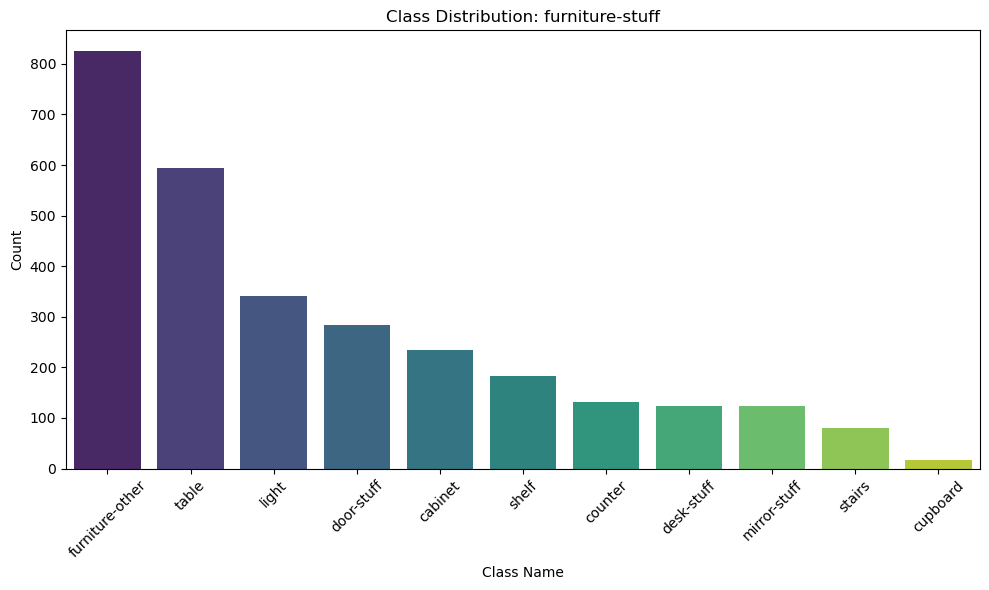

In [16]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# 1. Get Unique Supercategories
supercategories = sorted(df_exploded['supercategory'].unique())

# 2. Create Dropdown Widget
dropdown = widgets.Dropdown(
    options=supercategories,
    value=supercategories[0],
    description='Supercategory:',
    disabled=False,
)

# 3. Define Plotting Function
def plot_class_distribution(change):
    selected_supercat = change['new'] if isinstance(change, dict) else change
    
    # Clear previous output
    clear_output(wait=True)
    display(dropdown) # Re-display dropdown so it stays at top
    
    # Filter data
    subset = df_exploded[df_exploded['supercategory'] == selected_supercat]
    counts = subset['name'].value_counts()
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.index, y=counts.values, palette="viridis")
    plt.title(f"Class Distribution: {selected_supercat}")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Link Widget to Function
dropdown.observe(plot_class_distribution, names='value')

# 5. Initial Display
plot_class_distribution(dropdown.value)

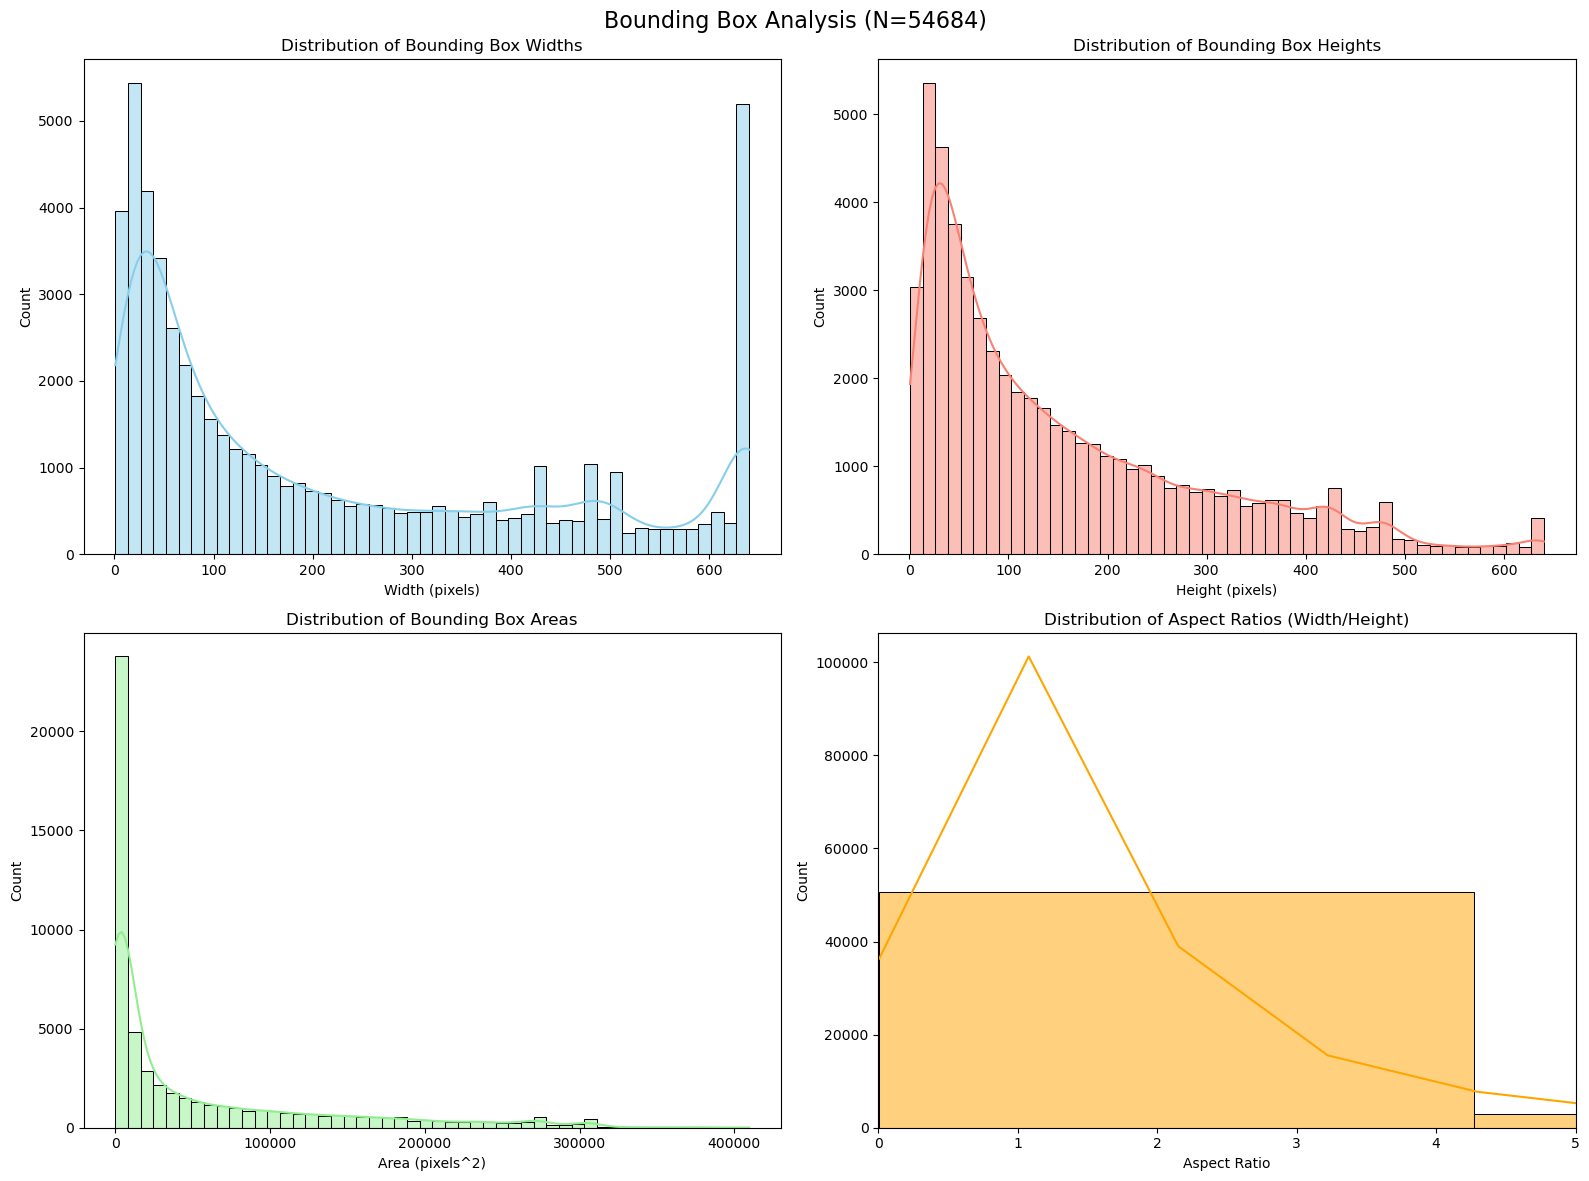

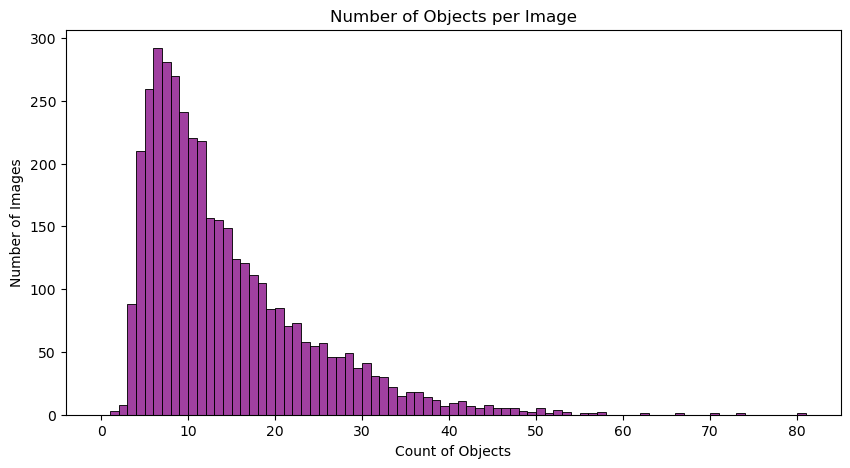

In [10]:
# 1. Extract Box Metrics directly from the exploded dataframe
# df_exploded['bbox'] contains lists like [x, y, w, h]

# Convert the 'bbox' column (which contains lists) into a proper 2D numpy array
# or separate columns for easier plotting.
bbox_array = np.array(df_exploded['bbox'].tolist())

# Create a specific DataFrame for box stats to keep things clean
df_boxes = pd.DataFrame(bbox_array, columns=['x', 'y', 'width', 'height'])

# Add derived metrics
df_boxes['area'] = df_boxes['width'] * df_boxes['height']
# Handle potential division by zero if height is 0 (unlikely but possible in bad data)
df_boxes['aspect_ratio'] = df_boxes['width'] / (df_boxes['height'] + 1e-6) 
df_boxes['supercategory'] = df_exploded['supercategory'] # Bring in supercategory for potential filtering

# 2. Plot Box Dimensions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Width Distribution
sns.histplot(df_boxes['width'], bins=50, ax=axes[0, 0], color='skyblue', kde=True)
axes[0, 0].set_title('Distribution of Bounding Box Widths')
axes[0, 0].set_xlabel('Width (pixels)')

# Height Distribution
sns.histplot(df_boxes['height'], bins=50, ax=axes[0, 1], color='salmon', kde=True)
axes[0, 1].set_title('Distribution of Bounding Box Heights')
axes[0, 1].set_xlabel('Height (pixels)')

# Area Distribution (Log Scale usually helps visualization)
sns.histplot(df_boxes['area'], bins=50, ax=axes[1, 0], color='lightgreen', kde=True)
axes[1, 0].set_title('Distribution of Bounding Box Areas')
axes[1, 0].set_xlabel('Area (pixels^2)')

# Aspect Ratio Distribution
sns.histplot(df_boxes['aspect_ratio'], bins=50, ax=axes[1, 1], color='orange', kde=True)
axes[1, 1].set_title('Distribution of Aspect Ratios (Width/Height)')
axes[1, 1].set_xlabel('Aspect Ratio')
axes[1, 1].set_xlim(0, 5) # Focus on the most common ratios

plt.suptitle(f"Bounding Box Analysis (N={len(df_boxes)})", fontsize=16)
plt.tight_layout()
plt.show()

# 3. Objects per Image (using the original un-exploded dataframe for correct counts)
# We count the number of items in the 'bbox' list for each image row
objects_per_img = train_dataset.df['bbox'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(objects_per_img, bins=range(0, objects_per_img.max() + 2), kde=False, color='purple')
plt.title('Number of Objects per Image')
plt.xlabel('Count of Objects')
plt.ylabel('Number of Images')
plt.show()

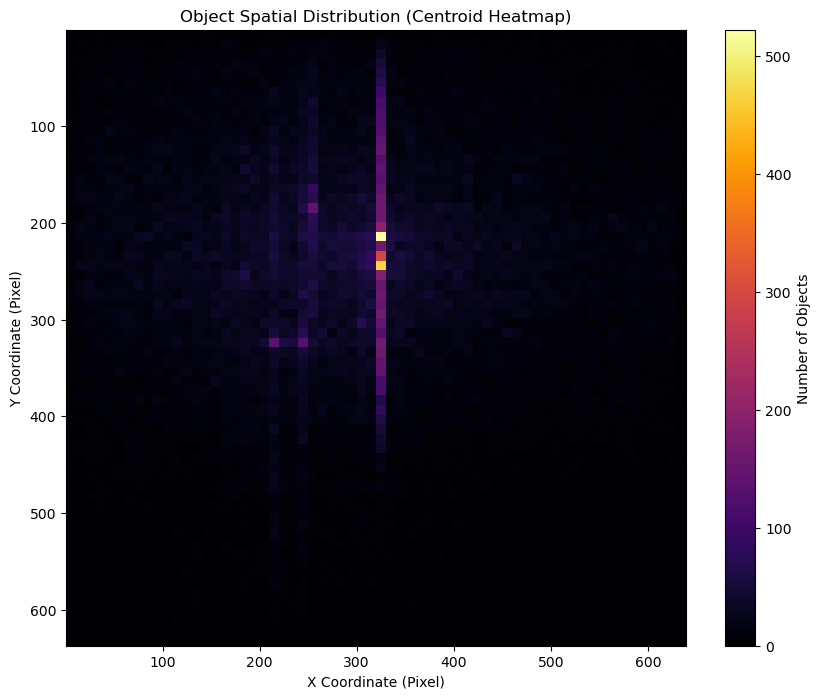

In [11]:
# 1. Calculate Centroids
# We already have df_boxes from Section 3 with columns: x, y, width, height
# Center X = x + width / 2
# Center Y = y + height / 2
center_x = df_boxes['x'] + df_boxes['width'] / 2
center_y = df_boxes['y'] + df_boxes['height'] / 2

# 2. Plot 2D Histogram (Heatmap)
plt.figure(figsize=(10, 8))
plt.hist2d(center_x, center_y, bins=[64, 64], cmap='inferno')

# Add labels and title
plt.colorbar(label='Number of Objects')
plt.title('Object Spatial Distribution (Centroid Heatmap)')
plt.xlabel('X Coordinate (Pixel)')
plt.ylabel('Y Coordinate (Pixel)')

# Invert Y axis because image coordinates start from top-left (0,0)
plt.gca().invert_yaxis()

plt.show()

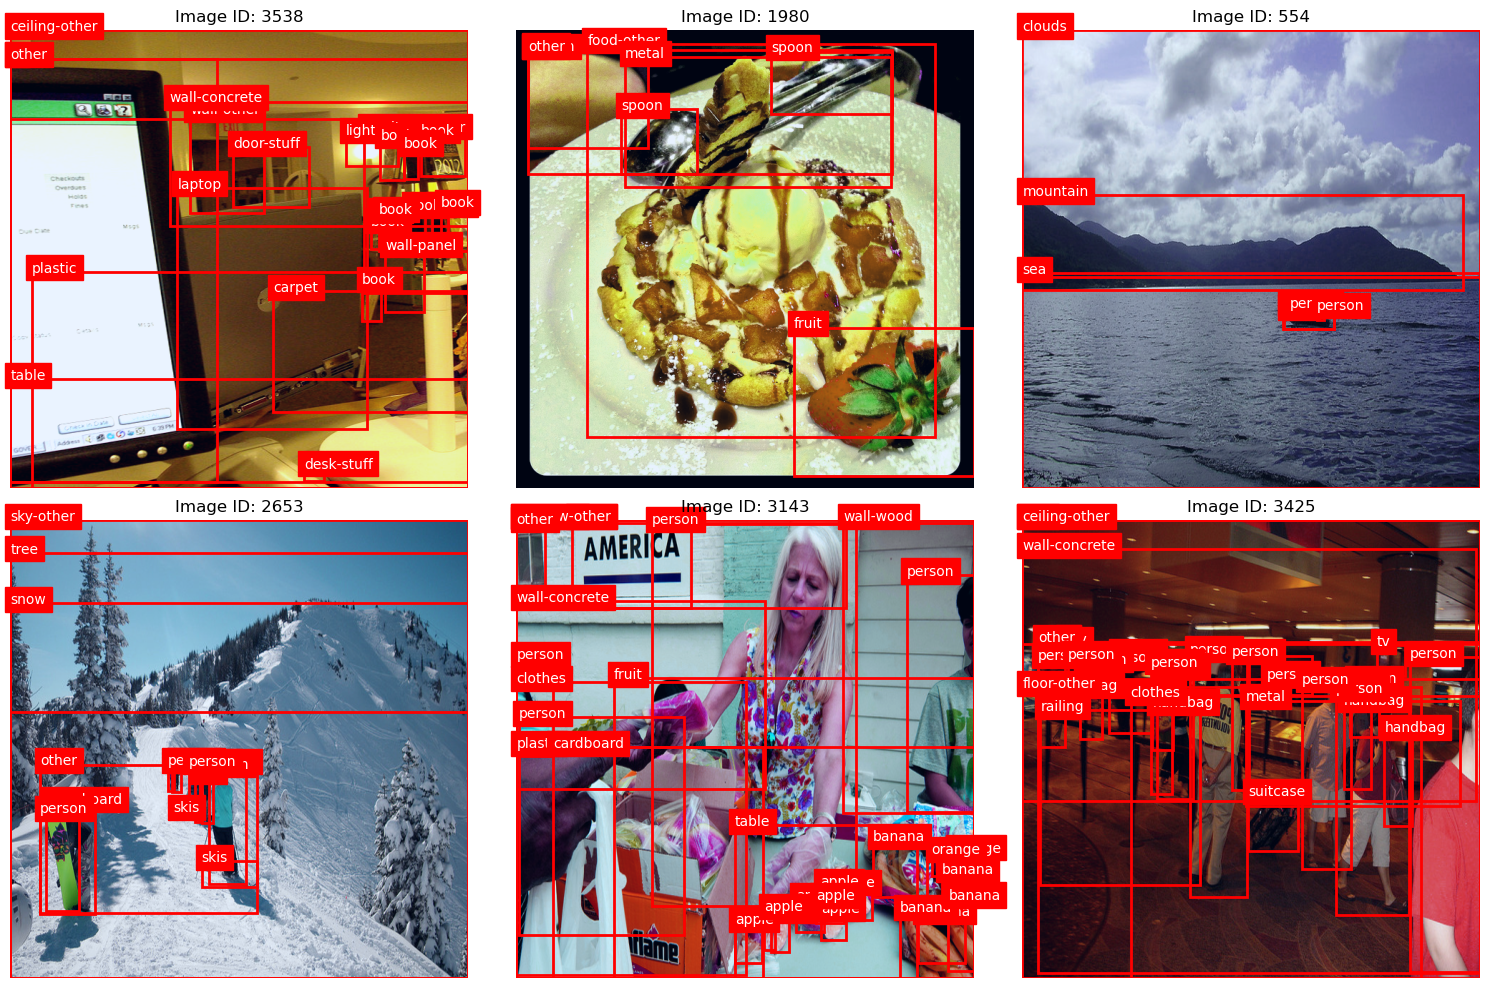

In [14]:
# 1. Helper Function to Denormalize Images
def denormalize(tensor):
    img = tensor.clone().detach().cpu()
    img = img - img.min()
    img = img / img.max()
    return img.permute(1, 2, 0).numpy()

# 2. Visualization Grid
num_samples = 6
cols = 3
rows = math.ceil(num_samples / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

indices = random.sample(range(len(train_dataset)), num_samples)

for i, idx in enumerate(indices):
    # Get image and target from dataset
    img_tensor, target = train_dataset[idx]
    img_np = denormalize(img_tensor)
    
    axes[i].imshow(img_np)
    
    # Plot Bounding Boxes (XYWH format)
    # Target likely contains 'boxes' and 'labels'
    if isinstance(target, dict) and 'boxes' in target:
        boxes = target['boxes'].cpu().numpy() # Shape: [N, 4] (x, y, w, h)
        labels = target['name']
        
        for box, label in zip(boxes, labels):
            x, y, w, h, _ = box # Unpack directly as x, y, w, h
            
            # Draw Box
            rect = plt.Rectangle((x, y), w, h, 
                                 fill=False, color='red', linewidth=2)
            axes[i].add_patch(rect)
            
            # Add Label Text
            axes[i].text(x, y, f"{label}", 
                         color='white', fontsize=10, backgroundcolor='red')
            
    axes[i].set_title(f"Image ID: {idx}")
    axes[i].axis('off')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

/var/folders/jy/vjwv208n3m70825g0z1wsb2r0000gn/T/ipykernel_2454/3253699932.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='name', y='area', ax=axes[i], order=order, palette="coolwarm")
/var/folders/jy/vjwv208n3m70825g0z1wsb2r0000gn/T/ipykernel_2454/3253699932.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='name', y='area', ax=axes[i], order=order, palette="coolwarm")
/var/folders/jy/vjwv208n3m70825g0z1wsb2r0000gn/T/ipykernel_2454/3253699932.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=su

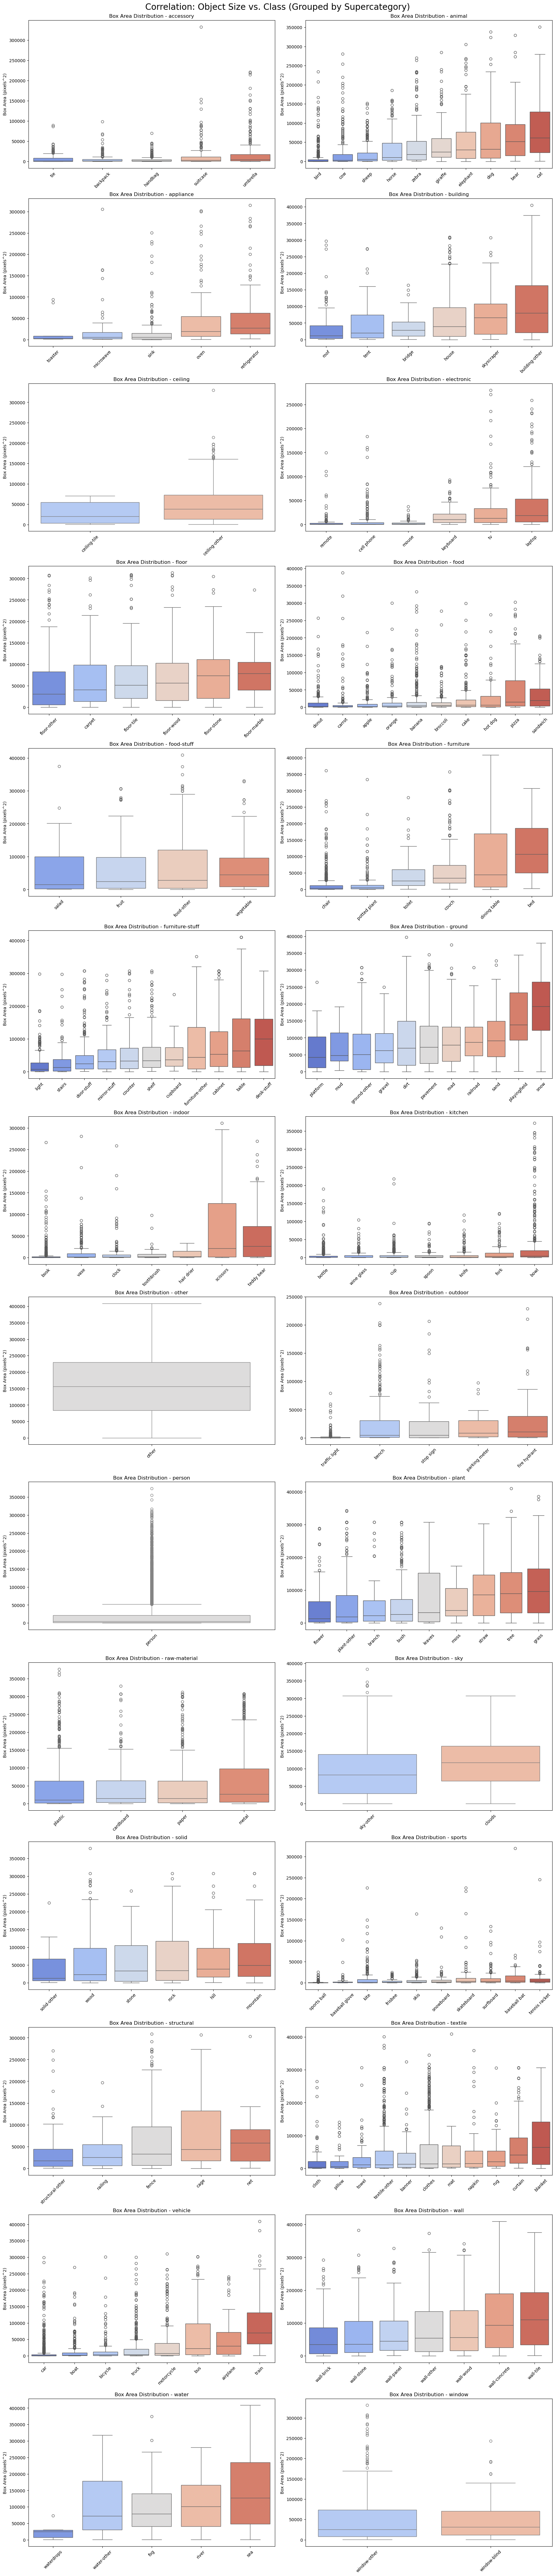

In [15]:
# 1. Prepare Data
# We use df_exploded which has 'name' (class name) and 'bbox'
# We need to recalculate area because 'df_boxes' from Section 3 didn't have class names
df_corr = df_exploded[['name', 'supercategory']].copy()

# Extract width and height again from bbox list [x, y, w, h]
# (Ensuring we handle lists correctly)
bboxes = df_exploded['bbox'].tolist()
df_corr['width'] = [b[2] for b in bboxes]
df_corr['height'] = [b[3] for b in bboxes]
df_corr['area'] = df_corr['width'] * df_corr['height']

# 2. Plot Box Area Distribution per Supercategory
# Similar to Section 2, we use subplots because there are many classes
unique_supercats = df_corr['supercategory'].unique()
cols = 2
rows = math.ceil(len(unique_supercats) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows), constrained_layout=True)
axes = axes.flatten()

for i, supercat in enumerate(sorted(unique_supercats)):
    subset = df_corr[df_corr['supercategory'] == supercat]
    
    # Sort classes by median area for better readability
    order = subset.groupby('name')['area'].median().sort_values().index
    
    sns.boxplot(data=subset, x='name', y='area', ax=axes[i], order=order, palette="coolwarm")
    
    axes[i].set_title(f"Box Area Distribution - {supercat}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Box Area (pixels^2)")
    axes[i].tick_params(axis='x', rotation=45)
    
    # Optional: Log scale if variance is huge (very small vs very large objects)
    # axes[i].set_yscale('log') 

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Correlation: Object Size vs. Class (Grouped by Supercategory)", fontsize=20)
plt.show()